In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as st

In [125]:
df=pd.read_csv('D:\DataScience\June\Linear_Regression\Diamond_Price_Prediction\diamonds.csv')

In [126]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [127]:
df.drop('Unnamed: 0',inplace=True, axis=1)

In [128]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [130]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [131]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [132]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [133]:
df.shape

(53940, 10)

In [134]:
print((df.x==0).sum())
print((df.y==0).sum())
print((df.z==0).sum())

8
7
20


In [135]:
df[df.x==0]

,carat,cut,color,clarity,depth,table,price,x,y,z
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0


In [136]:
df[['x','y','z']]=df[['x','y','z']].replace(0,np.nan)

In [137]:
(df.x==0).sum()

0

In [138]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53932.000000,53933.000000,53920.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.732007,5.735270,3.540046
std,0.474011,1.432621,2.234491,3989.439738,1.119670,1.140339,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


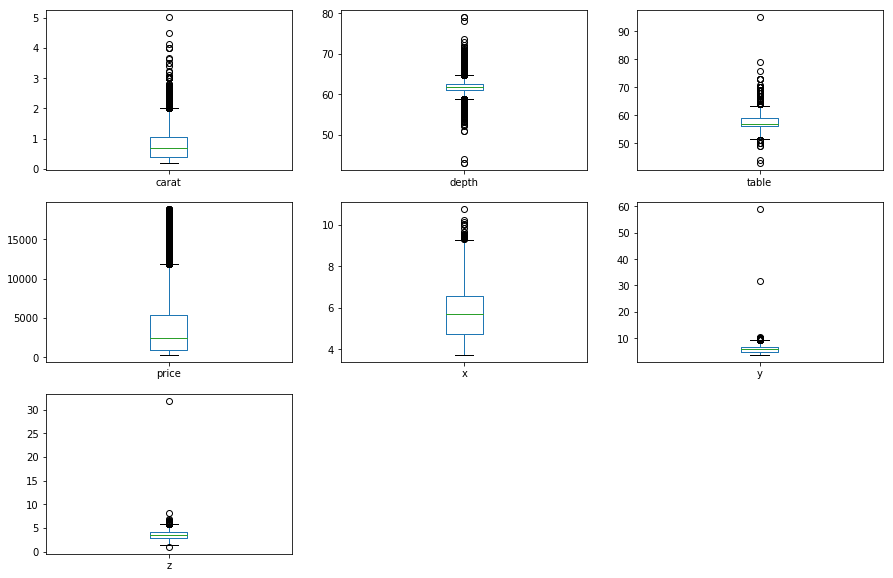

In [139]:
df.plot(kind='box',figsize=(15,10),subplots=True,layout=(3,3))
plt.show()

In [140]:
df.isna().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64

In [141]:
df.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64

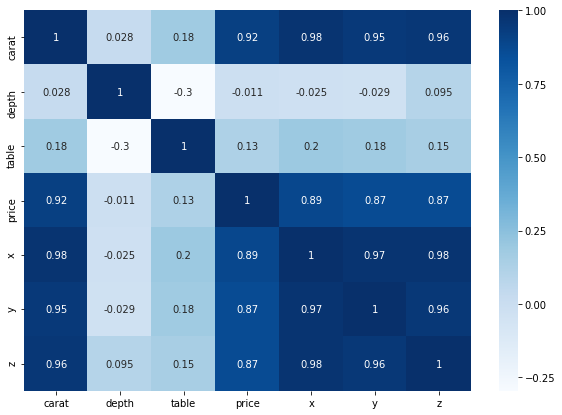

In [142]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

C:\Users\91897\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\91897\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


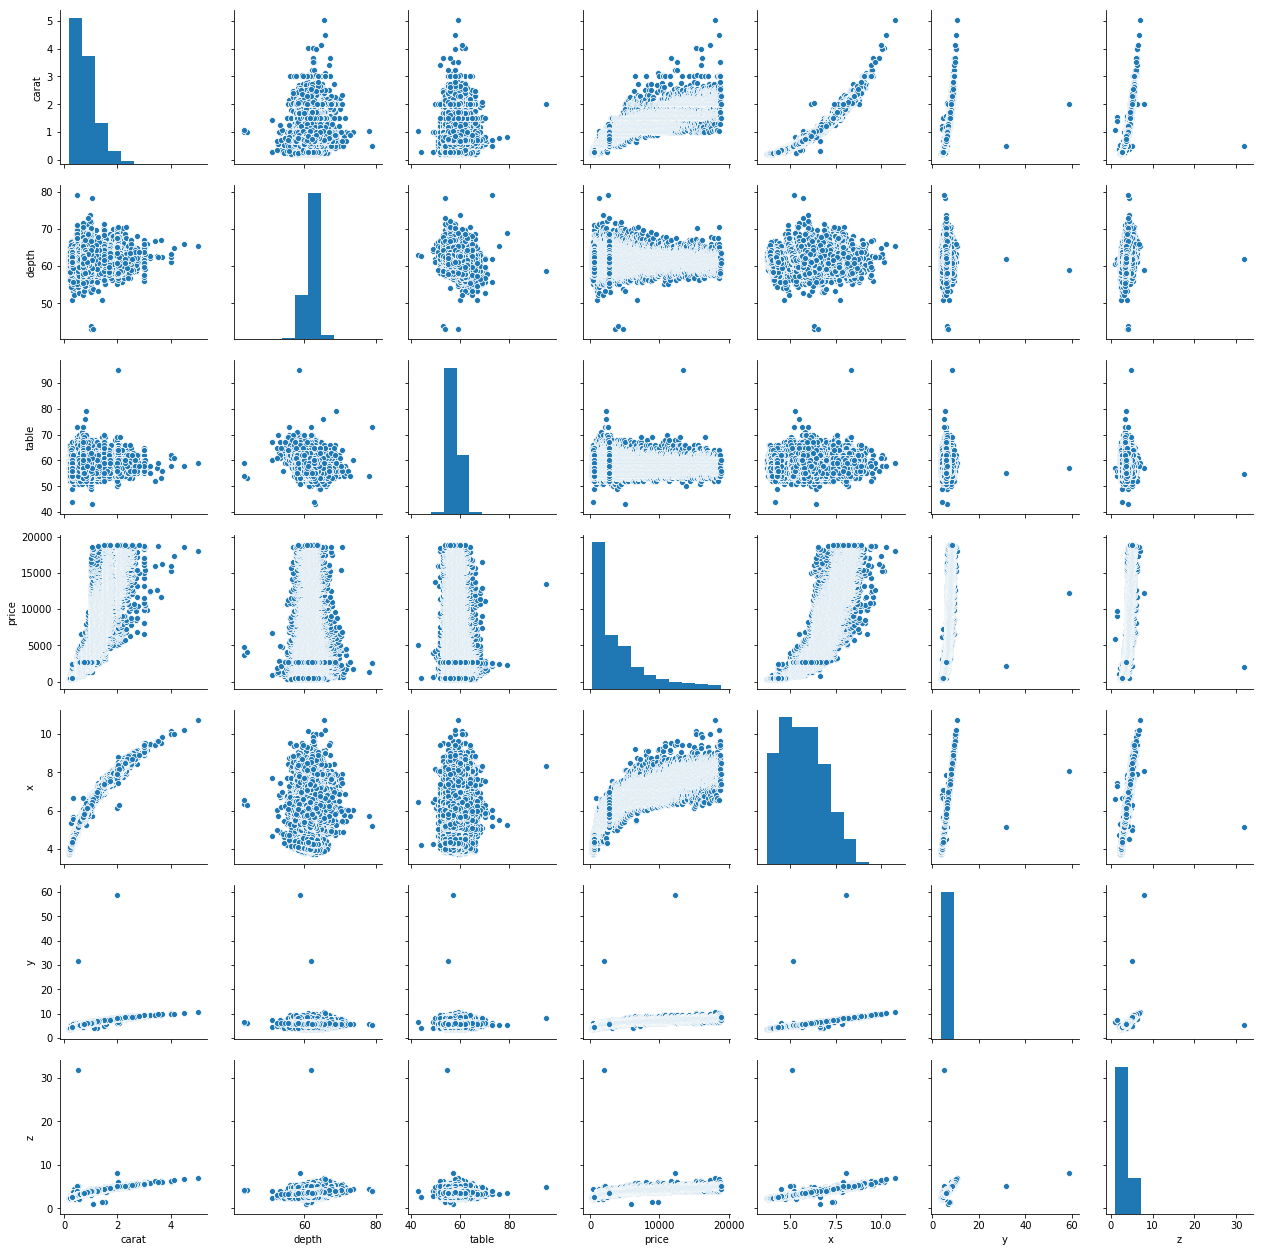

In [143]:
sns.pairplot(df)

In [144]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53932.000000,53933.000000,53920.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.732007,5.735270,3.540046
std,0.474011,1.432621,2.234491,3989.439738,1.119670,1.140339,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [145]:
df.dropna(inplace=True)

In [146]:
df.shape

(53920, 10)

In [147]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [148]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001634692E748>,
      dtype=object)

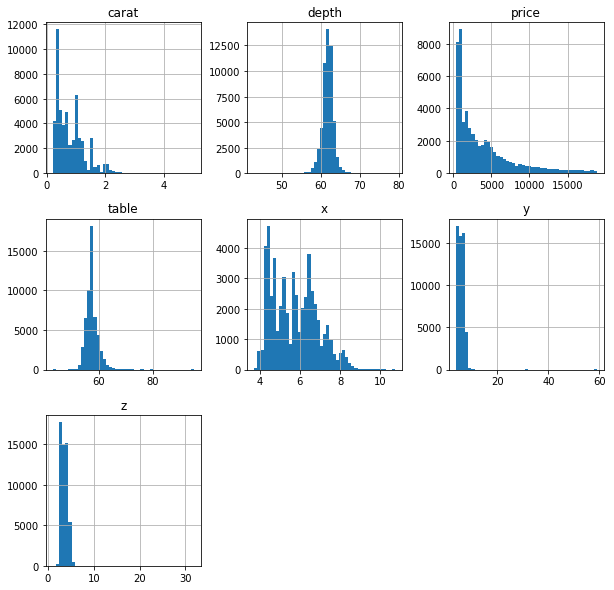

In [149]:
df.hist(figsize=(10,10),bins=45)

C:\Users\91897\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


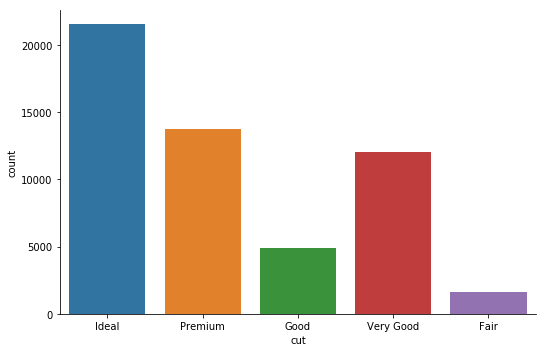

In [150]:
sns.factorplot(x='cut',data=df,kind='count',aspect=1.5)

C:\Users\91897\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


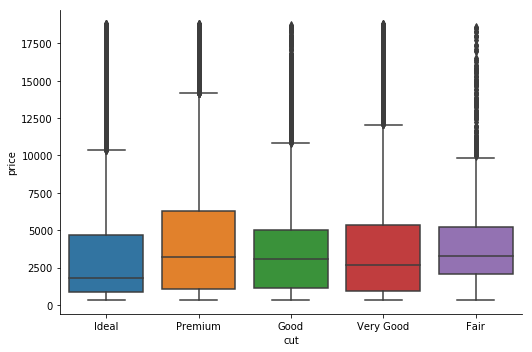

In [151]:
sns.factorplot(x='cut',y='price',data=df,kind='box',aspect=1.5)

#One Hot Encoding Implimentation

In [152]:
one_hot_df=pd.get_dummies(df)
one_hot_df.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [153]:
cols=one_hot_df.columns
clean_data=pd.DataFrame(one_hot_df,columns=cols)
clean_data.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


## Data Scaling

In [154]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
numericals=pd.DataFrame(sc_x.fit_transform(clean_data[['carat','depth','table','price','x','y','z']]),
                        columns=['carat','depth','table','price','x','y','z'],index=clean_data.index)

C:\Users\91897\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\91897\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [155]:
numericals.head()

,carat,depth,table,price,x,y,z
0,-1.198204,-0.174203,-1.099725,-0.904132,-1.591573,-1.539219,-1.580084
1,-1.240417,-1.361090,1.585988,-0.904132,-1.645173,-1.662014,-1.750896
2,-1.198204,-3.385781,3.376463,-0.903881,-1.502241,-1.460280,-1.750896
3,-1.071566,0.454149,0.243131,-0.902125,-1.368242,-1.319943,-1.295396
4,-1.029353,1.082501,0.243131,-0.901875,-1.243176,-1.214690,-1.124583


In [156]:
clean_data_standard=clean_data.copy(deep=True)
clean_data_standard[['carat','depth','price','x','y','z','table']]=numericals[['carat','depth','price','x','y','z','table']]
clean_data_standard.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.198204,-0.174203,-1.099725,-0.904132,-1.591573,-1.539219,-1.580084,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,-1.240417,-1.361090,1.585988,-0.904132,-1.645173,-1.662014,-1.750896,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,-1.198204,-3.385781,3.376463,-0.903881,-1.502241,-1.460280,-1.750896,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,-1.071566,0.454149,0.243131,-0.902125,-1.368242,-1.319943,-1.295396,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,-1.029353,1.082501,0.243131,-0.901875,-1.243176,-1.214690,-1.124583,0,1,0,...,0,1,0,0,0,1,0,0,0,0


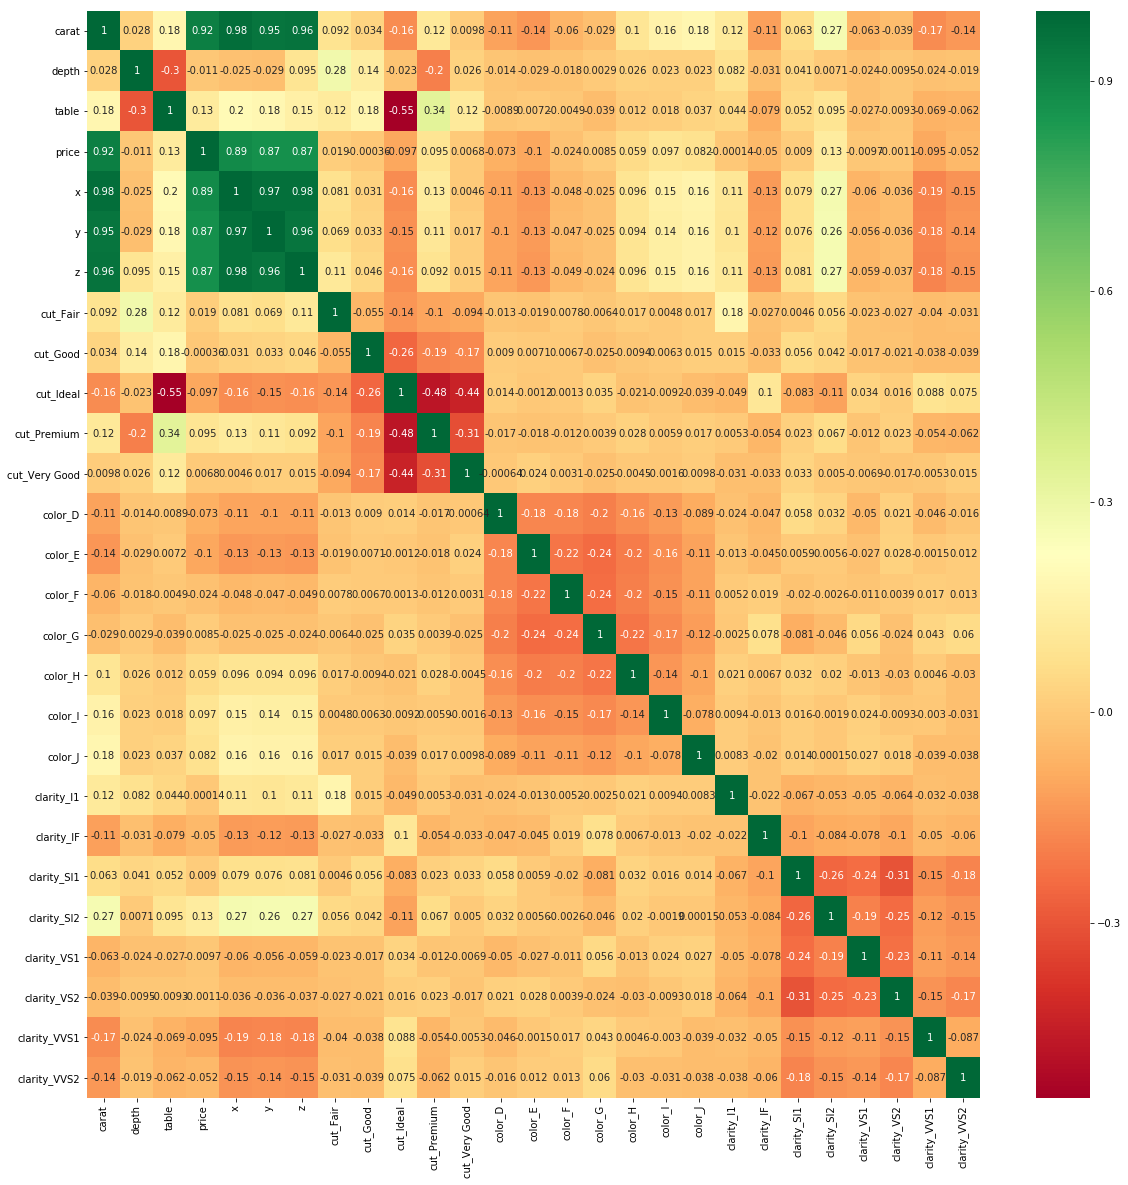

In [157]:
plt.figure(figsize=(20,20))
sns.heatmap(clean_data_standard.corr(),cmap='RdYlGn',annot=True)

In [158]:
x=clean_data_standard.drop(['price'],axis=1)
y=clean_data_standard.price

In [159]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)

## Model Training

## Linear Regression

In [160]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [161]:
y_pred=reg.predict(x_test)

In [162]:
print('Mean absolute error: {}'.format(mean_absolute_error(y_test,y_pred)))
print('Mean squared error: {}'.format(mean_squared_error(y_test,y_pred)))
print('r2 score: {}'.format(r2_score(y_test,y_pred)))
print('accuracy is: {}'.format(reg.score(x_test,y_test)*100))

Mean absolute error: 0.18482984614435402
Mean squared error: 0.07749655977900584
r2 score: 0.9231713465044585
accuracy is: 92.31713465044585


In [163]:
print(reg.score(x_test,y_test)*100)

92.31713465044585


In [175]:
from sklearn.linear_model import Lasso
reg_lass=Lasso()
reg_lass.fit(x_train,y_train)
y_pred_lasso=reg_lass.predict(x_test)
print('Mean absolute error: {}'.format(mean_absolute_error(y_test,y_pred_lasso)))
print('Mean squared error: {}'.format(mean_squared_error(y_test,y_pred_lasso)))
print('r2_score: {}'.format(r2_score(y_test,y_pred_lasso)))
print('accuracy: {}'.format(reg_lass.score(x_test,y_test)*100))

Mean absolute error: 0.7619512116235949
Mean squared error: 1.0088114648853217
r2_score: -0.0001169948578876312
accuracy: -0.01169948578876312


In [178]:
from sklearn.linear_model import Ridge
reg_rid=Ridge()
reg_rid.fit(x_train,y_train)
y_pred_rid=reg_rid.predict(x_test)
print('Mean absolute error: {}'.format(mean_absolute_error(y_test,y_pred_rid)))
print('Mean squared error: {}'.format(mean_squared_error(y_test,y_pred_rid)))
print('r2_score: {}'.format(r2_score(y_test,y_pred_rid)))
print('accuracy: {}'.format(reg_rid.score(x_test,y_test)*100))

Mean absolute error: 0.18483249987500236
Mean squared error: 0.07749360193357079
r2_score: 0.9231742788576194
accuracy: 92.31742788576194


In [179]:
l=list(range(0,len(clean_data_standard.columns)))

In [182]:
import statsmodels.formula.api as smf
x=np.append(arr=np.ones((clean_data_standard.shape[0],1)).astype(int),
            values=clean_data_standard.drop(['price'],axis=1).values,axis=1)
x_opt=x[:,l]
regressor_ols=smf.OLS(endog=clean_data_standard.price,exog=x_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.821e+04
Date:                Mon, 15 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:15:02   Log-Likelihood:                -8379.8
No. Observations:               53920   AIC:                         1.681e+04
Df Residuals:                   53897   BIC:                         1.701e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0961      0.002    -57.390      0.000      -0.099      -0.093
x1             1.3697      0.006    223.296      0.000       1.358       1.382
x2            -0.0236      0.002    -14.227      0.000      -0.027      -0.020
x3            -0.0149      0.002     -9.127      0.000      -0.018      -0.012
x4            -0.3032      0.009    -34.441      0.000      -0.320      -0.286
x5            -0.0189      0.007     -2.872      0.004      -0.032      -0.006
x6            -0.1634      0.006    -25.527      0.000      -0.176      -0.151
x7            -0.0190      0.004     -5.128      0.000      -0.026      -0.012
x8             0.0438      0.003     15.417      0.000       0.038       0.049
x9             0.0255      0.003      9.542      0.000       0.020       0.031
x10            0.0169      0.003      6.335      0.000       0.012       0.022
x11            0.1933      0.003     58.821      0.000       0.187       0.200
x12            0.1410      0.003     50.114      0.000       0.135       0.146
x13            0.1263      0.003     45.157      0.000       0.121       0.132
x14            0.0737      0.003     28.041      0.000       0.069       0.079
x15           -0.0524      0.003    -17.751      0.000      -0.058      -0.047
x16           -0.1754      0.004    -49.041      0.000      -0.182      -0.168
x17           -0.4026      0.005    -82.887      0.000      -0.412      -0.393
x18           -0.9701      0.010   -101.635      0.000      -0.989      -0.951
x19            0.3695      0.006     59.083      0.000       0.357       0.382
x20           -0.0475      0.003    -16.742      0.000      -0.053      -0.042
x21           -0.2885      0.003    -88.411      0.000      -0.295      -0.282
x22            0.1806      0.003     55.326      0.000       0.174       0.187
x23            0.1026      0.003     35.987      0.000       0.097       0.108
x24            0.2852      0.005     62.324      0.000       0.276       0.294
x25            0.2721      0.004     68.832      0.000       0.264       0.280
==============================================================================
Omnibus:                    14444.305   Durbin-Watson:                   1.208
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           638508.611
Skew:                           0.537   Prob(JB):                         0.00
Kurtosis:                      19.824   Cond. No.                     1.03e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.53e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [184]:
l.pop(5)
x=np.append(arr=np.ones((clean_data_standard.shape[0],1)).astype(int),
            values=clean_data_standard.drop(['price'],axis=1).values,axis=1)
x_opt=x[:,l]
regressor_ols=smf.OLS(endog=clean_data_standard.price,exog=x_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.955e+04
Date:                Mon, 15 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:15:39   Log-Likelihood:                -8383.9
No. Observations:               53920   AIC:                         1.681e+04
Df Residuals:                   53898   BIC:                         1.701e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2249      0.006    -36.863      0.000      -0.237      -0.213
x1             1.3692      0.006    223.283      0.000       1.357       1.381
x2            -0.0258      0.001    -17.533      0.000      -0.029      -0.023
x3            -0.0148      0.002     -9.082      0.000      -0.018      -0.012
x4            -0.3213      0.006    -52.321      0.000      -0.333      -0.309
x5             0.1443      0.008     17.169      0.000       0.128       0.161
x6             0.2071      0.008     24.774      0.000       0.191       0.223
x7             0.1891      0.008     23.443      0.000       0.173       0.205
x8             0.1800      0.008     22.319      0.000       0.164       0.196
x9             0.1749      0.003     51.545      0.000       0.168       0.182
x10            0.1225      0.003     41.733      0.000       0.117       0.128
x11            0.1079      0.003     37.144      0.000       0.102       0.114
x12            0.0553      0.003     20.094      0.000       0.050       0.061
x13           -0.0707      0.003    -23.090      0.000      -0.077      -0.065
x14           -0.1937      0.004    -52.606      0.000      -0.201      -0.187
x15           -0.4210      0.005    -85.269      0.000      -0.431      -0.411
x16           -0.9861      0.009   -103.830      0.000      -1.005      -0.967
x17            0.3533      0.006     55.899      0.000       0.341       0.366
x18           -0.0636      0.003    -21.453      0.000      -0.069      -0.058
x19           -0.3046      0.003    -90.912      0.000      -0.311      -0.298
x20            0.1644      0.003     48.725      0.000       0.158       0.171
x21            0.0865      0.003     29.037      0.000       0.081       0.092
x22            0.2690      0.005     57.656      0.000       0.260       0.278
x23            0.2560      0.004     63.211      0.000       0.248       0.264
==============================================================================
Omnibus:                    14446.653   Durbin-Watson:                   1.207
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           638699.746
Skew:                           0.537   Prob(JB):                         0.00
Kurtosis:                      19.827   Cond. No.                     6.91e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.38e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [185]:
l.pop(5)
x=np.append(arr=np.ones((clean_data_standard.shape[0],1)).astype(int),
            values=clean_data_standard.drop(['price'],axis=1).values,axis=1)
x_opt=x[:,l]
regressor_ols=smf.OLS(endog=clean_data_standard.price,exog=x_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 3.085e+04
Date:                Mon, 15 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:18:49   Log-Likelihood:                -8531.0
No. Observations:               53920   AIC:                         1.710e+04
Df Residuals:                   53899   BIC:                         1.729e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1364      0.003    -41.662      0.000      -0.143      -0.130
x1             1.3709      0.006    222.972      0.000       1.359       1.383
x2            -0.0309      0.001    -21.408      0.000      -0.034      -0.028
x3            -0.0177      0.002    -10.896      0.000      -0.021      -0.015
x4            -0.3237      0.006    -52.575      0.000      -0.336      -0.312
x5             0.0898      0.005     18.592      0.000       0.080       0.099
x6             0.0744      0.005     16.417      0.000       0.065       0.083
x7             0.0657      0.005     14.390      0.000       0.057       0.075
x8             0.1878      0.003     56.559      0.000       0.181       0.194
x9             0.1354      0.003     47.607      0.000       0.130       0.141
x10            0.1200      0.003     42.501      0.000       0.114       0.126
x11            0.0676      0.003     25.393      0.000       0.062       0.073
x12           -0.0585      0.003    -19.588      0.000      -0.064      -0.053
x13           -0.1806      0.004    -49.991      0.000      -0.188      -0.173
x14           -0.4081      0.005    -83.406      0.000      -0.418      -0.399
x15           -0.9956      0.010   -104.730      0.000      -1.014      -0.977
x16            0.3667      0.006     58.306      0.000       0.354       0.379
x17           -0.0485      0.003    -17.082      0.000      -0.054      -0.043
x18           -0.2915      0.003    -89.105      0.000      -0.298      -0.285
x19            0.1785      0.003     54.404      0.000       0.172       0.185
x20            0.1009      0.003     35.174      0.000       0.095       0.107
x21            0.2833      0.005     61.523      0.000       0.274       0.292
x22            0.2697      0.004     67.773      0.000       0.262       0.278
==============================================================================
Omnibus:                    14295.995   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           650639.171
Skew:                           0.510   Prob(JB):                         0.00
Kurtosis:                      19.987   Cond. No.                     8.47e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.59e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""